# Bar charts

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Average precision data
attacks = ['ARP MitM', 'Active Wiretap', 'Fuzzing', 'OS Scan', 'Syn DoS', 'SSDP Flood', 'SSL Ren', 'Video Inj']
methods = ['MLP', 'PCA', 'SVD', 'NMF', 'GRP', 'AEN', 'FA']
# Average Precision per method
MLP_AP = [0.9759, 0.9735, 0.9396, 0.4888, 0.0766, 0.9941, 0.5443, 0.0985]
PCA_AP = [0.9403, 0.9138, 0.3296, 0.4901, 0.1947, 0.9925, 0.4863, 0.7321]
InPCA_AP=[0.9416, 0.9217, 0.4174, 0.4907, 0.1918, 0.9927, 0.4874, 0.7305]
SVD_AP = [0.9357, 0.9142, 0.3406, 0.4907, 0.1946, 0.9923, 0.4888, 0.7314]
NMF_AP = [0.9486, 0.9329, 0.4705, 0.4899, 0.1905, 0.9933, 0.4587, 0.7303]
GRP_AP = [0.9813, 0.9761, 0.7891, 0.0712, 0.0094, 0.9897, 0.0966, 0.1175]
SRP_AP = [0.9811, 0.9765, 0.8197, 0.0724, 0.0083, 0.9911, 0.0940, 0.1174]
AEN_AP = [0.9519, 0.9600, 0.4261, 0.4903, 0.1975, 0.9925, 0.4784, 0.7324]
FA_AP =  [0.9494, 0.9111, 0.5744, 0.4268, 0.2062, 0.9741, 0.4589, 0.6996]       

In [3]:
# area under curve data
PCA_AUC = [0.41, 0.35, 0.23, 0.92, 0.58, 0.58, 0.82, 0.88]
InPCA_AUC=[0.42, 0.40, 0.44, 0.92, 0.59, 0.59, 0.82, 0.87]
SVD_AUC = [0.38, 0.35, 0.25, 0.92, 0.58, 0.57, 0.82, 0.88]
NMF_AUC = [0.51, 0.48, 0.51, 0.92, 0.45, 0.63, 0.83, 0.88]
GRP_AUC = [0.78, 0.78, 0.85, 0.10, 0.54, 0.54, 0.52, 0.46]
SRP_AUC = [0.78, 0.78, 0.87, 0.12, 0.50, 0.56, 0.50, 0.46]
AEN_AUC = [0.47, 0.64, 0.42, 0.92, 0.61, 0.58, 0.83, 0.88]
MLP_AUC = [0.72, 0.72, 0.96, 0.92, 0.69, 0.69, 0.87, 0.32]
FA_AUC =  [0.45, 0.33, 0.63, 0.85, 0.68, 0.31, 0.81, 0.88]

In [4]:
AP_list = [MLP_AP, PCA_AP, SVD_AP, NMF_AP, GRP_AP, AEN_AP, FA_AP]
AUC_list =[MLP_AUC, PCA_AUC, SVD_AUC, NMF_AUC, GRP_AUC, AEN_AUC, FA_AUC]

In [5]:
# create data dictionaries
AP = dict()
AUC = dict()
i=0
for m in methods:
    AP[m]=dict(zip(attacks,AP_list[i]))
    AUC[m]=dict(zip(attacks,AUC_list[i]))
    i=i+1

In [6]:
results = dict()
results['AP']=AP
results['AUC']=AUC

In [7]:
print(results['AP']['MLP']['Fuzzing'])

0.9396


In [19]:
# plot color bars
def color_bar_plot(attack='Fuzzing', metric='AP'):
    x = 0 # start position
    width = 0.1  # bar width
    fig, ax = plt.subplots(figsize=(5, 5))
    rect1 = ax.bar(x-0.3, results[metric]['MLP'][attack], width, label='MLP', align='center', color='r')
    rect2 = ax.bar(x-0.2, results[metric]['PCA'][attack], width, label='PCA', align='center', color='b')
    rect3 = ax.bar(x-0.1, results[metric]['SVD'][attack], width, label='SVD', align='center', color='g')
    rect4 = ax.bar(x-0.0, results[metric]['NMF'][attack], width, label='NMF', align='center', color='y')
    rect5 = ax.bar(x+0.1, results[metric]['GRP'][attack], width, label='GRP', align='center', color='c')
    rect6 = ax.bar(x+0.2, results[metric]['AEN'][attack], width, label='AEN', align='center', color='m')
    rect7 = ax.bar(x+0.3, results[metric]['FA'][attack],  width, label='FA',  align='center', color='k')
    ax.set_title(attack)
    ax.set_xlabel('Методы')
    ax.set_xticks(list(np.linspace(-0.3, 0.3, num=len(methods))))
    ax.set_xticklabels(methods)
    #ax.legend(loc='upper center', ncol=4)
    ax.grid(axis='y')
    ax.set_ylim(0,1)
    fig.tight_layout()
    # save fig
    fig.savefig(attack + '_' + metric + '_' +'color.png')
    plt.show()

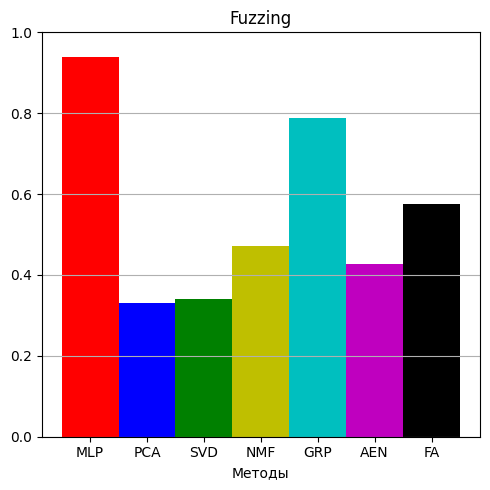

In [23]:
color_bar_plot(attack='Fuzzing', metric='AP')

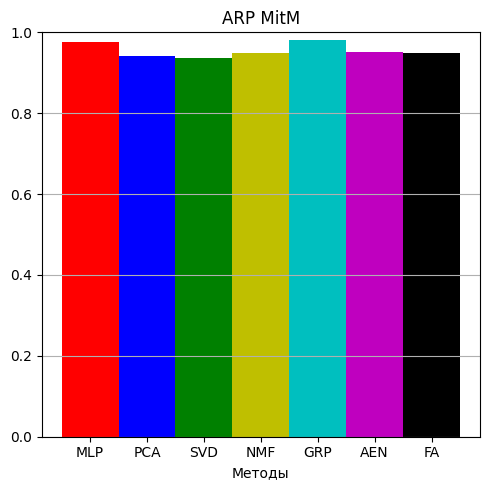

In [37]:
color_bar_plot(attack='ARP MitM', metric='AP')

In [14]:
# plot black-white bars
def black_white_bar_plot(attack='ARP MitM', metric='AUC'):
    # i - attack number
    x = 0 # start position
    width = 0.1  # bar width
    fig, ax = plt.subplots(figsize=(5, 5))
    rect1 = ax.bar(x-0.3, results[metric]['MLP'][attack], width, label='MLP', align='center', color='0.8', edgecolor='k', linewidth=2)
    rect2 = ax.bar(x-0.2, results[metric]['PCA'][attack], width, label='PCA', align='center', color='w', edgecolor='k', linewidth=2, hatch='-')
    rect3 = ax.bar(x-0.1, results[metric]['SVD'][attack], width, label='SVD', align='center', color='w', edgecolor='k', linewidth=2, hatch='/')
    rect4 = ax.bar(x-0.0, results[metric]['NMF'][attack], width, label='NMF', align='center', color='w', edgecolor='k', linewidth=2, hatch='\\')
    rect5 = ax.bar(x+0.1, results[metric]['GRP'][attack], width, label='GRP', align='center', color='w', edgecolor='k', linewidth=2, hatch='x')
    rect6 = ax.bar(x+0.2, results[metric]['AEN'][attack], width, label='AEN', align='center', color='w', edgecolor='k', linewidth=2, hatch='*')
    rect7 = ax.bar(x+0.3, results[metric]['FA'][attack],  width, label='FA',  align='center', color='w', edgecolor='k', linewidth=2, hatch='.')
    ax.set_title(attack)
    ax.set_xlabel('Методы')
    ax.set_xticks(list(np.linspace(-0.3, 0.3, num=len(methods))))
    ax.set_xticklabels(methods)
    #ax.legend(loc='upper center', ncol=4)
    ax.grid(axis='y')
    ax.set_ylim(0,1)
    fig.tight_layout()
    # save fig
    fig.savefig(attack + '_' + metric + '_' +'black_white.png')
    plt.show()

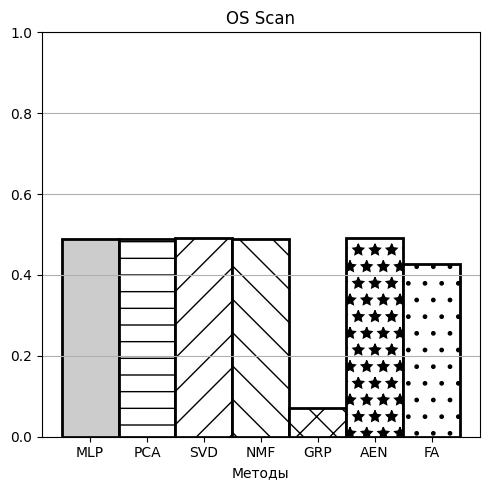

In [15]:
black_white_bar_plot(attack='OS Scan', metric='AP')

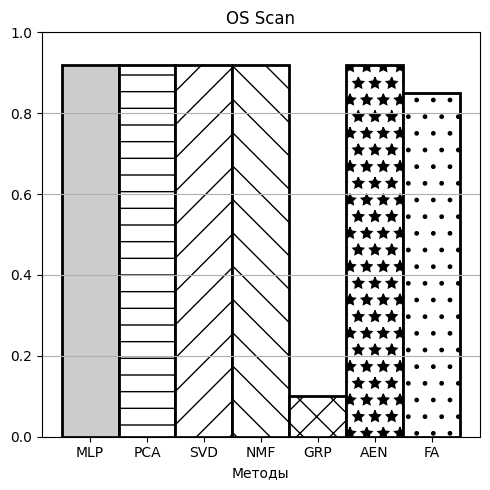

In [40]:
black_white_bar_plot(attack='OS Scan', metric='AUC')